In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

tqdm.pandas()

%matplotlib inline

NUM_FEATURES = 5000
NUM_CLASSES = 3993

features = pd.read_csv("../data/expanded/train_features.csv", names=range(NUM_FEATURES))
labels = pd.read_csv("../data/expanded/train_labels.csv", names=range(NUM_CLASSES))

In [2]:
features

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.050734,0.346484,0.518671,0.195764,0.175015,0.851925,0.137765,0.583356,0.609220,0.463946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.016911,0.069297,0.047152,0.130509,0.525045,0.000000,0.137765,0.000000,1.523051,0.463946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.372048,0.242539,0.518671,0.261019,1.487627,0.958415,0.137765,1.458391,0.000000,0.773243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.321314,0.381132,0.424367,0.065255,0.087507,0.851925,0.137765,1.020873,1.979966,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12404,0.050734,0.277187,0.282912,0.261019,0.525045,0.851925,0.413296,0.145839,0.456915,0.927891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12405,0.253669,0.485078,0.801583,0.065255,0.612552,1.171396,0.137765,0.437517,1.066136,0.927891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12406,0.202935,0.450429,0.424367,0.195764,0.700060,0.851925,0.275531,0.145839,2.132271,0.463946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12407,0.321314,0.242539,0.801583,0.195764,0.525045,0.106491,0.137765,0.145839,0.152305,0.154649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
labels

,0,1,2,3,4,5,6,7,8,9,...,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12407,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
features.describe()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
count,12409.000000,12409.000000,12409.000000,12409.000000,12409.000000,12409.000000,12409.000000,12409.000000,12409.000000,12409.000000,...,12409.000000,12409.000000,12409.000000,12409.000000,12409.000000,12409.000000,12409.000000,12409.000000,12409.000000,12409.000000
mean,0.121856,0.706756,0.526689,0.219696,0.497852,1.259419,0.225716,0.573366,1.631846,0.784933,...,0.062362,0.053516,0.053516,0.059266,0.030075,0.058824,0.043344,0.310041,0.058530,0.025274
std,0.580136,1.852536,1.532167,0.282607,2.156431,3.653447,0.592351,1.385634,5.413851,3.980125,...,1.387819,2.475236,1.546986,1.373008,0.713364,1.783005,0.941604,20.587039,1.200433,0.524479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050734,0.173242,0.141456,0.130509,0.175015,0.319472,0.137765,0.145839,0.304610,0.309297,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.067645,0.311836,0.235760,0.130509,0.262522,0.638943,0.137765,0.291678,0.609220,0.463946,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.118379,0.692968,0.518671,0.261019,0.525045,1.064906,0.275531,0.583356,1.370746,0.927891,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,59.307835,87.383263,115.192162,10.832283,211.768082,203.077530,42.707283,70.440269,351.367889,404.869812,...,82.324593,263.438690,120.742737,76.836288,54.883060,164.649185,65.859673,2195.322510,66.027512,33.013756


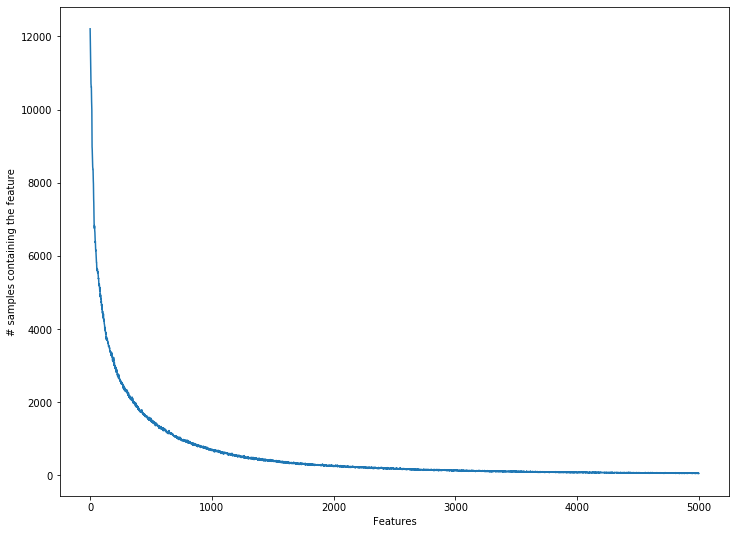

In [5]:
(features != 0).sum(axis=0).plot(figsize=(12, 9))
plt.xlabel("Features")
plt.ylabel("# samples containing the feature")
plt.show()

In [6]:
examples_per_label = labels.sum(axis=0)
examples_per_label.describe()

count    3993.000000
mean       16.526421
std        43.634313
min         0.000000
25%         1.000000
50%         4.000000
75%        13.000000
max       793.000000
dtype: float64

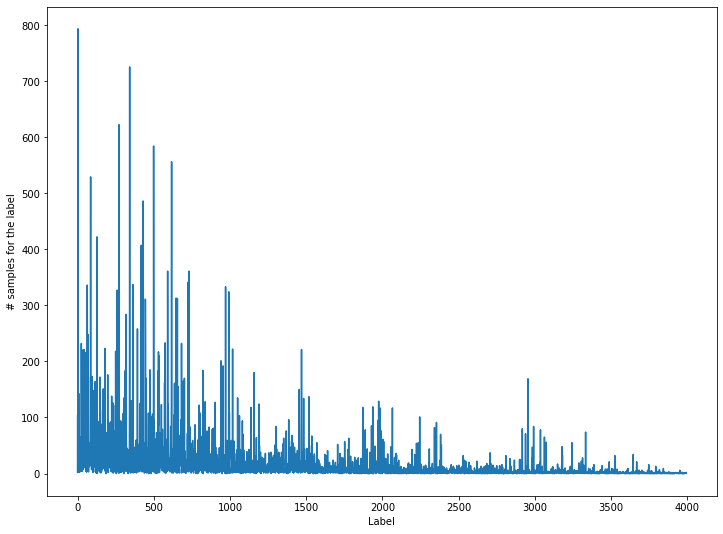

In [7]:
examples_per_label.plot(figsize=(12, 9))
plt.xlabel("Label")
plt.ylabel("# samples for the label")
plt.show()

In [8]:
print(f"{examples_per_label[examples_per_label == 0].shape[0]} labels with no examples")

373 labels with no examples


In [9]:
# Count of examples in the given range. For example, the second line can be
# interpreted as - there are 1211 examples having 2, 3, 4, or 5 labels each
pd.cut(
    examples_per_label,
    bins=[0, 1, 5, 25, 125, 250, 500, 1010],
    include_lowest=True
).value_counts(sort=False)

(-0.001, 1.0]      1133
(1.0, 5.0]         1199
(5.0, 25.0]        1080
(25.0, 125.0]       485
(125.0, 250.0]       72
(250.0, 500.0]       18
(500.0, 1010.0]       6
dtype: int64

In [10]:
labels_per_example = labels.sum(axis=1)
labels_per_example.describe()

count    12409.000000
mean         5.317914
std          1.352185
min          1.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         24.000000
dtype: float64